In [1]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [2]:
# 加载数据集
def load_data(data_path):
    points = np.loadtxt(data_path)
    return points

In [3]:
data = load_data('../know_user_kmeans.txt')
print(data.shape)

(112, 4163)


In [4]:
# 使用PCA进行降维处理。从1000维降至2维。
data_PCA = PCA(n_components=2).fit_transform(data)

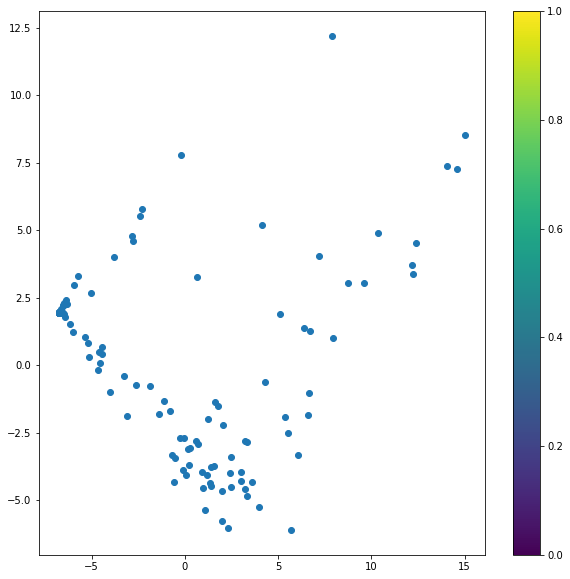

In [5]:
plt.figure(figsize=(10, 10))
plt.plot(2)
plt.scatter(data_PCA[:, 0], data_PCA[:, 1])
plt.colorbar()#使用这一句就可以分辨出，颜色对应的类了！神奇啊。
plt.show()

In [6]:
#  encoding=utf-8

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


class DBScan (object):
    """
    the class inherits from object, encapsulate the  DBscan algorithm
    """
    def __init__(self, p):

        self.point = p
        self.db = DBSCAN(eps=5, min_samples=21).fit(self.point)

    def draw(self):

        coreSamplesMask = np.zeros_like(self.db.labels_, dtype=bool)
        coreSamplesMask[self.db.core_sample_indices_] = True
        labels = self.db.labels_
        nclusters = jiangzao(labels)

        # 绘制结果
        # 黑色被移除，并被标记为噪音。
        unique_labels = set(labels)
        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # 黑色用于噪声
                col = 'k'

            classMemberMask = (labels == k)

            # 画出分类点集
            xy = self.point[classMemberMask & coreSamplesMask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=6)

            # 画出噪声点集
            xy = self.point[classMemberMask & ~coreSamplesMask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=3)
        # 加标题，显示分类数
        plt.title('Estimated number of clusters: %d' % nclusters)
        plt.show()


def jiangzao (labels):

    # 标签中的簇数，忽略噪声（如果存在）
    clusters = len(set(labels)) - (1 if -1 in labels else 0)
    return clusters

def standar_scaler(points):

    p = StandardScaler().fit_transform(points)
    return p

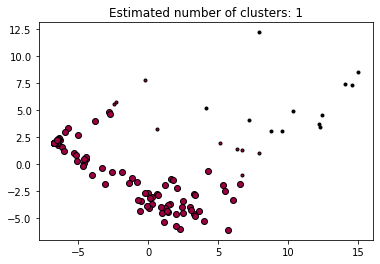

In [7]:
 db = DBScan(data_PCA)
 db.draw()

In [8]:
# 评价
from evaluation import E

e = E(data, y_pred)

NameError: name 'y_pred' is not defined

In [10]:
print(data_PCA.shape)

(112, 2)
